# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


# Use Case: Predicting Canadian Housing Prices

## Problem Statement

The Canadian housing market has experienced significant fluctuations over the past two decades. Accurately predicting future housing prices is crucial for various stakeholders, including homeowners, real estate investors, and policymakers. This project aims to develop a machine learning model that can effectively predict Canadian housing prices based on historical data and relevant economic indicators.

## Objectives

1. **Identify Key Factors**: Determine the most significant factors influencing Canadian housing prices, such as population growth, median income, interest rates, and economic indicators.
2. **Build Predictive Model**: Develop a robust machine learning model capable of accurately forecasting future housing prices.
3. **Evaluate Model Performance**: Assess the model's performance using appropriate metrics, such as mean squared error (MSE) and R-squared.
4. **Validate Findings**: Conduct hypothesis testing to validate the significance of the identified factors and the overall predictive power of the model.

## Data

The dataset will comprise historical Canadian housing price data spanning at least 20 years. Additional features will include:

* Demographic data: Population growth, age distribution, and household size.
* Economic indicators: Gross domestic product (GDP), inflation rate, unemployment rate, and consumer confidence index.
* Interest rates: Mortgage rates and overall interest rates.
* Housing supply and demand: Number of new housing starts, inventory levels, and housing affordability indices.

## Methodology

### Data Preprocessing:
* Handle missing values and outliers.
* Normalize numerical features.
* Encode categorical features.

### Feature Engineering:
* Create new features, such as interaction terms and time-based features.
* Select relevant features using techniques like correlation analysis and feature importance.

### Model Selection and Training:
* Experiment with various regression algorithms, including linear regression, decision trees, random forests, and neural networks.
* Employ techniques like cross-validation to evaluate model performance and prevent overfitting.

### Hypothesis Testing:
* **Null Hypothesis**: The macroeconomic indicators (median income, mortgage rates, and population) do not have a significant influence on house prices across different property types.

* **Alternative Hypothesis**: The hypothesis posits that macroeconomic indicators such as median income, mortgage rates, and population significantly influence house prices across different property types.
* Conduct t-tests or F-tests to determine the statistical significance of the coefficients in the regression model.

## Evaluation

The model's performance will be evaluated using the following metrics:

* **Mean Squared Error (MSE)**: Measures the average squared difference between the predicted and actual values.
* **Root Mean Squared Error (RMSE)**: The square root of MSE, providing a more interpretable error metric.
* **R-squared**: Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

## Expected Outcomes

1. **Identify key drivers of housing prices**: The analysis will uncover the most significant factors influencing housing prices in Canada.
2. **Develop a predictive model**: A robust machine learning model will be developed to forecast future housing prices with a high degree of accuracy.
3. **Inform decision-making**: The model can be used by various stakeholders to make informed decisions related to real estate investments, mortgage lending, and urban planning.

## Limitations and Future Work

### Current Limitations:
* **Data Availability**: The quality and availability of data can impact the model's accuracy.
* **External Factors**: Unforeseen events, such as natural disasters or economic crises, can significantly impact housing prices and may not be fully captured by the model.
* **Model Complexity**: As the model becomes more complex, interpretability may decrease.

### Future Research Directions:
* **Spatial analysis**: Incorporating geographic information to account for regional variations in housing prices.
* **Time series analysis**: Using time series models to capture the temporal dependencies in housing prices.
* **Deep learning**: Applying deep learning techniques to model complex non-linear relationships.

By addressing these limitations and exploring future research directions, this project can contribute to a deeper understanding of the Canadian housing market and provide valuable insights for policymakers and market participants.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 
df = pd.read_csv("melted_data_1120.csv")
df


,Date,Median income,Population,Mortgage Rate,Interest Rate,property_type,price
0,2005-01-01,4487.500000,1.069167e+07,5.60,2.75,One_storey,207700
1,2005-02-01,4487.500000,1.069167e+07,5.59,2.75,One_storey,208400
2,2005-03-01,4487.500000,1.069167e+07,5.60,2.75,One_storey,209200
3,2005-04-01,4487.500000,1.071352e+07,5.67,2.75,One_storey,210100
4,2005-05-01,4487.500000,1.071352e+07,5.55,2.75,One_storey,210600
...,...,...,...,...,...,...,...
1040,2022-01-01,5066.666667,1.285534e+07,3.44,0.50,Composite,810100
1041,2022-02-01,5066.666667,1.285534e+07,3.58,0.50,Composite,834700
1042,2022-03-01,5066.666667,1.285534e+07,3.77,0.75,Composite,834300
1043,2022-04-01,5066.666667,1.289414e+07,4.19,1.25,Composite,819800


## Comprehensive Data Analysis

### Normality Tests

Hypotheses are:

- 𝐻₀: The price variable follows a normal distribution.
- 𝐻₁: The price variable does not follow a normal distribution.

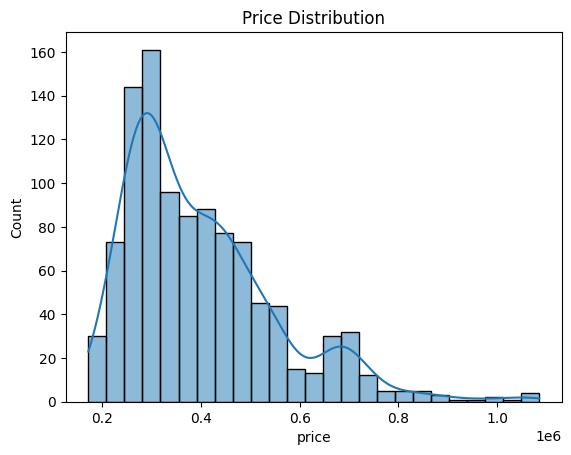

Shapiro-Wilk Test Statistic: 0.9031603037666053
P-Value: 3.4851035096884093e-25
The 'price' data does NOT follow a normal distribution (reject H0).


In [3]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("melted_data_1120.csv")

# Extract the 'price' column
price_data = df['price']

sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(price_data)

# Display results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The 'price' data does NOT follow a normal distribution (reject H0).")
else:
    print("The 'price' data follows a normal distribution (fail to reject H0).")


#### Interpretation:
 - Since the p-value is less than 0.05, the null hypothesis (𝐻₀) is rejected. This means that the price data does not follow a normal distribution.

#### Data transformations is applyed

##### Data Transformation (Log Transformation)

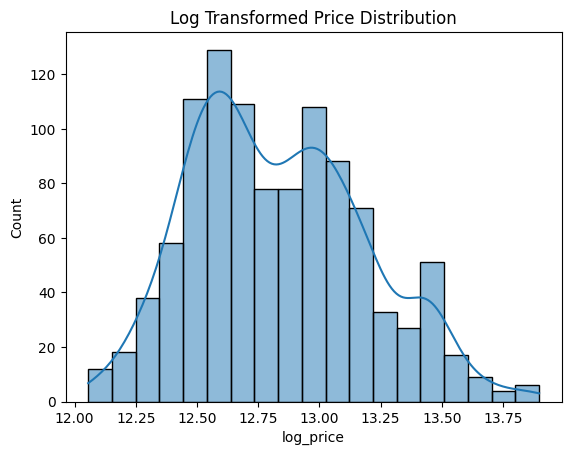

Shapiro-Wilk Test Statistic: 0.9820873466805021
P-Value: 4.843805358702262e-10
The log-transformed price data does not follow a normal distribution.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation to the 'price' column
df['log_price'] = np.log(df['price'])

# Plot the transformed data to visualize the effect of the transformation
sns.histplot(df['log_price'], kde=True)
plt.title('Log Transformed Price Distribution')
plt.show()

# Check the normality of the transformed data
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test on the log-transformed data
stat, p_value = shapiro(df['log_price'])
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The log-transformed price data does not follow a normal distribution.")
else:
    print("The log-transformed price data follows a normal distribution.")


##### Square Root Transformation

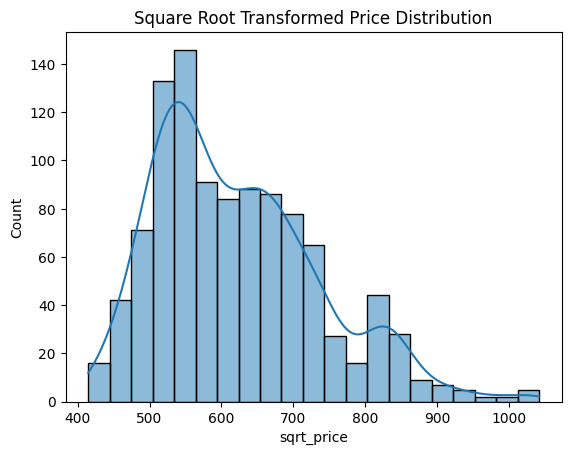

Shapiro-Wilk Test Statistic: 0.9525691916517539
P-Value: 7.30196900064755e-18
The square root transformed price data does not follow a normal distribution.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Apply square root transformation
df['sqrt_price'] = np.sqrt(df['price'])

# Plot the transformed data
sns.histplot(df['sqrt_price'], kde=True)
plt.title('Square Root Transformed Price Distribution')
plt.show()

# Perform the Shapiro-Wilk test to check for normality of the transformed data
stat, p_value = shapiro(df['sqrt_price'])
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The square root transformed price data does not follow a normal distribution.")
else:
    print("The square root transformed price data follows a normal distribution.")


##### Box-Cox Transformation

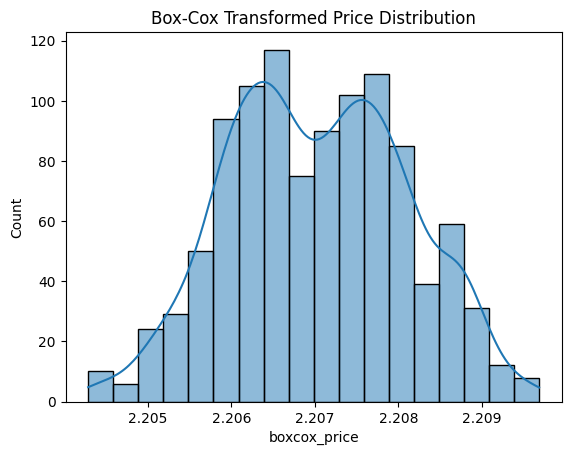

Shapiro-Wilk Test Statistic: 0.991238570756283
P-Value: 7.1146264858421454e-06
The Box-Cox transformed price data does not follow a normal distribution.


In [5]:
from scipy import stats

# Apply Box-Cox transformation (requires positive values in the data)
# If there are zero or negative values, add a constant to make the data positive
if (df['price'] <= 0).any():
    df['price'] = df['price'] + abs(df['price'].min()) + 1

# Apply the Box-Cox transformation
df['boxcox_price'], lambda_value = stats.boxcox(df['price'])

# Plot the transformed data
sns.histplot(df['boxcox_price'], kde=True)
plt.title('Box-Cox Transformed Price Distribution')
plt.show()

# Perform the Shapiro-Wilk test on the Box-Cox transformed data
stat, p_value = shapiro(df['boxcox_price'])
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The Box-Cox transformed price data does not follow a normal distribution.")
else:
    print("The Box-Cox transformed price data follows a normal distribution.")


Conslusion: 
- Since none of the transformations managed to normalize the price, to continue with the project you could use nonparametric methods or models that do not assume normality such as Random Forests or K-Nearest Neighbors (KNN) are nonparametric models that can be applied to data that does not have a normal distribution.

### Variance Analysis

### T-Tests and Chi-Square Tests

sfadffa


### Implement Pearson's correlation adequately to the purposes and targets of your term project.

Pearson's Correlation Coefficient: -0.414240558292247
P-Value: 1.3707739815515327e-44
We reject H0: and we accept the alternative hypothesis H1. The correlation is statistically significant.


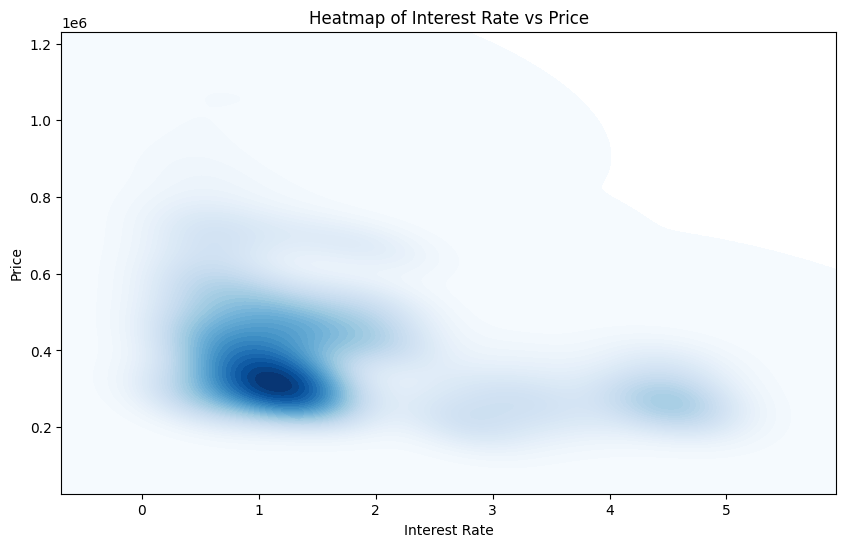

In [30]:
import scipy.stats as stats
# Select the relevant columns: Interest Rate and Price
interest_rate = df['Interest Rate']
price = df['price']

# Calculate Pearson's correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(interest_rate, price)

# Print the results
print(f"Pearson's Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("We reject H0: and we accept the alternative hypothesis H1. The correlation is statistically significant.")
else:
    print("We cannot reject H0. The correlation is not statistically significant.")

    import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the relationship between Interest Rate and Price
plt.figure(figsize=(10, 6))

# Use seaborn's kdeplot to create a heatmap-like density plot
sns.kdeplot(
    x=interest_rate,
    y=price,
    cmap="Blues",
    fill=True,
    thresh=0,
    levels=50
)

# Add labels and title
plt.title("Heatmap of Interest Rate vs Price")
plt.xlabel("Interest Rate")
plt.ylabel("Price")

# Display the heatmap
plt.show()


### Implement Logistic Classification adequately to the purposes and targets of your term project.

Accuracy: 0.5668789808917197
Confusion Matrix:
[[ 64  95]
 [ 41 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.40      0.48       159
           1       0.55      0.74      0.63       155

    accuracy                           0.57       314
   macro avg       0.58      0.57      0.56       314
weighted avg       0.58      0.57      0.55       314



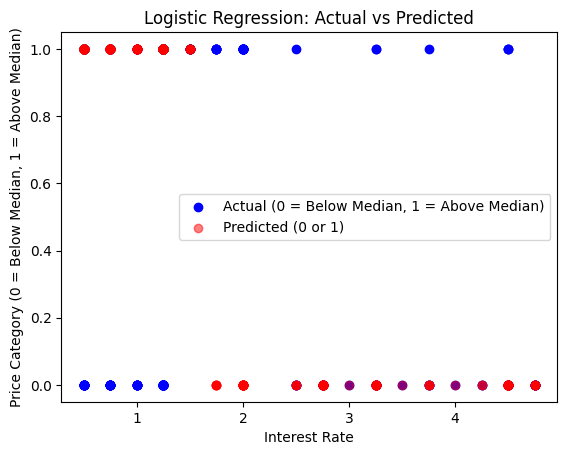

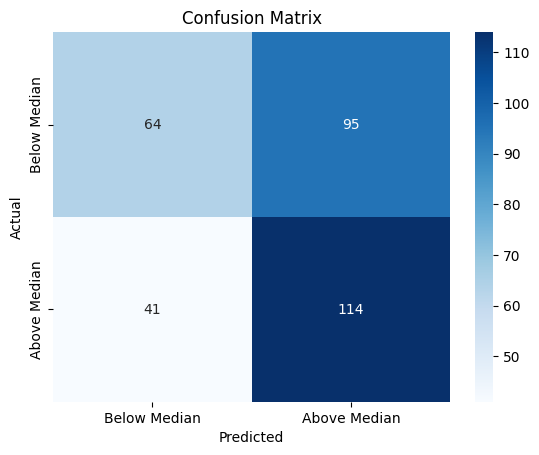

Optimization terminated successfully.
         Current function value: 0.620762
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  price   No. Observations:                 1045
Model:                          Logit   Df Residuals:                     1043
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.1044
Time:                        11:18:56   Log-Likelihood:                -648.70
converged:                       True   LL-Null:                       -724.33
Covariance Type:            nonrobust   LLR p-value:                 9.116e-35
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1102      0.117      9.525      0.000       0.882       1.339
Interest Rate    -0.

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
# Load the data
df = pd.read_csv("melted_data_1120.csv")

# Preprocessing: Select relevant columns
df = df[['Interest Rate', 'price']]

# Define the target variable dynamically
median_price = df['price'].median()
y = (df['price'] > median_price).astype(int)  # Create binary target variable in memory

# Features remain the same
X = df[['Interest Rate']]
# Rest of the process is unchanged
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)
df

import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual (0 = Below Median, 1 = Above Median)')
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Predicted (0 or 1)')

# Add labels and title
plt.xlabel("Interest Rate")
plt.ylabel("Price Category (0 = Below Median, 1 = Above Median)")
plt.title("Logistic Regression: Actual vs Predicted")
plt.legend()
plt.show()
df


import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Below Median', 'Above Median'], yticklabels=['Below Median', 'Above Median'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Adding Statsmodels Logistic Regression Summary
# Add a constant for the intercept term
X_with_constant = sm.add_constant(X)  # Statsmodels requires a constant explicitly

# Fit the model using Statsmodels
sm_model = sm.Logit(y, X_with_constant).fit()

# Print the summary
print(sm_model.summary())





### Summary of the Chart
The chart shows the results of a logistic regression model applied to predict house prices (Above Median = 1 or Below Median = 0) based on the interest rate. 

Key Observations:
- The chart shows a distinct clustering of points at 0 and 1, indicating that the model is trying to separate the data based on interest rate.
- There seems to be little variation in the predicted values across interest rates, suggesting that the data may not have a strong linear separability for this feature.

**Insights:**
- The predictions are fairly aligned with the actual values, but some deviations (misclassifications) are visible.
- Logistic regression might need additional features or transformations to better capture the relationship between interest rate and price category.

### Implement spearman's correlation adequately to the purposes and targets of your term project.

Spearman's Correlation Coefficient: -0.41039412947580445
P-value: 1.0151002048458779e-43
The correlation is statistically significant.


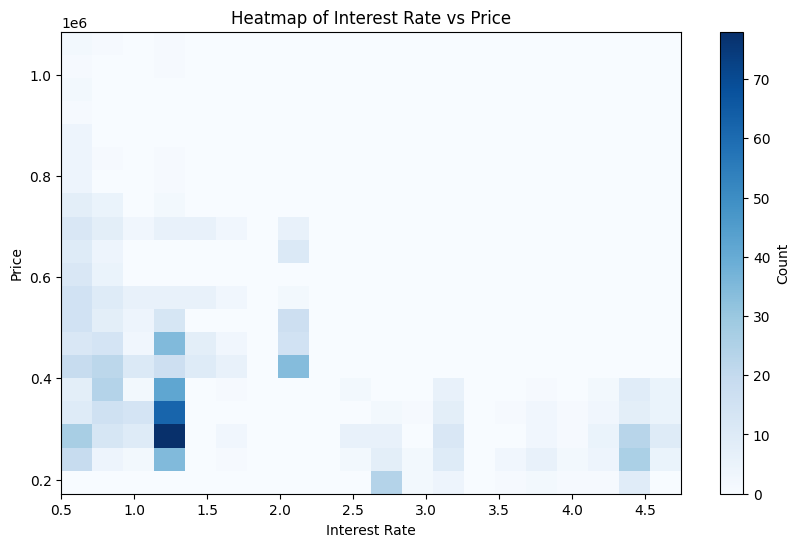

In [29]:
import pandas as pd
from scipy.stats import spearmanr

# Load the data
df = pd.read_csv("melted_data_1120.csv")

# Preprocessing: Select relevant columns
df = df[['Interest Rate', 'price']]

# Check for missing values and drop them if any
df = df.dropna()

# Calculate Spearman's correlation
correlation, p_value = spearmanr(df['Interest Rate'], df['price'])

# Display the results
print(f"Spearman's Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Optional: Visualize the relationship
import matplotlib.pyplot as plt
import seaborn as sns

# Define a heatmap using a 2D histogram (density-based approach)
plt.figure(figsize=(10, 6))
heatmap, xedges, yedges, _ = plt.hist2d(
    df['Interest Rate'], df['price'], bins=[20, 20], cmap='Blues'  # Adjust bins as needed
)
plt.colorbar(label='Count')  # Add a color bar to indicate density
plt.title("Heatmap of Interest Rate vs Price")
plt.xlabel("Interest Rate")
plt.ylabel("Price")
plt.show()



### Implement Probabilistic Reasoning adequately to the purposes and targets of your term project.

Conditional Probability Table:
price          Very Low       Low  Moderate      High  Very High
Interest Rate                                                   
Very Low       0.000000  0.461443  0.399254  0.120647   0.018657
Low            0.125000  0.875000  0.000000  0.000000   0.000000
Moderate       0.017391  0.982609  0.000000  0.000000   0.000000

Probabilities of price categories for interest rate 'Low':
price
Very Low     0.125
Low          0.875
Moderate     0.000
High         0.000
Very High    0.000
Name: Low, dtype: float64


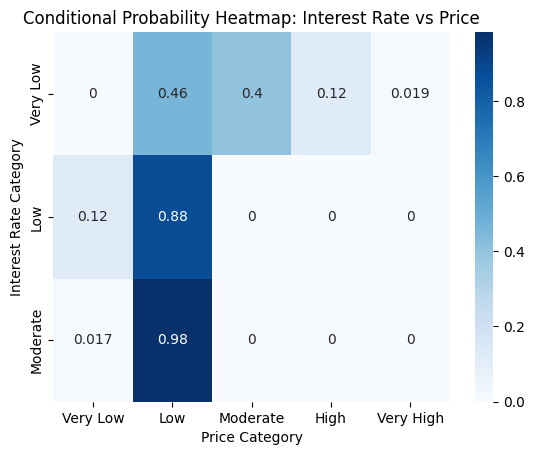

,Interest Rate,price
0,2.75,207700
1,2.75,208400
2,2.75,209200
3,2.75,210100
4,2.75,210600
...,...,...
1040,0.50,810100
1041,0.50,834700
1042,0.75,834300
1043,1.25,819800


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("melted_data_1120.csv")

# Preprocessing: Select relevant columns and handle missing values
df = df[['Interest Rate', 'price']].dropna()

# Define bins and labels for interest rates
bins_interest_rate = [0, 2, 4, 6, 8]  # Example bins for interest rates
labels_interest_rate = ['Very Low', 'Low', 'Moderate', 'High']

# Define bins and labels for house prices
bins_price = [0, 200000, 400000, 600000, 800000, 1000000]  # Example bins for price
labels_price = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Dynamically bin interest rates and house prices without modifying the original dataframe
interest_rate_categories = pd.cut(df['Interest Rate'], bins=bins_interest_rate, labels=labels_interest_rate, include_lowest=True)
price_categories = pd.cut(df['price'], bins=bins_price, labels=labels_price, include_lowest=True)

# Calculate conditional probabilities dynamically
prob_table = pd.crosstab(interest_rate_categories, price_categories, normalize='index')

# Display the probability table
print("Conditional Probability Table:")
print(prob_table)

# Example: Given an interest rate category, predict the likelihood of each price category
interest_rate_input = 'Low'  # Example input
if interest_rate_input in prob_table.index:
    print(f"\nProbabilities of price categories for interest rate '{interest_rate_input}':")
    print(prob_table.loc[interest_rate_input])
else:
    print(f"No data available for interest rate category '{interest_rate_input}'.")

# Visualize the probability distribution
sns.heatmap(prob_table, annot=True, cmap="Blues")
plt.title("Conditional Probability Heatmap: Interest Rate vs Price")
plt.xlabel("Price Category")
plt.ylabel("Interest Rate Category")
plt.show()
df

### Bayes model

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the data
df = pd.read_csv("melted_data_1120.csv")

# Define price ranges
def categorize_price(price):    
    if price < 200000:
        return 'Low'
    elif price < 500000:
        return 'Medium'
    else:
        return 'High'

# Apply the price categorization function
df['price_category'] = df['price'].apply(categorize_price)

# Display the first rows to see the new column
print(df.head())

# Select features (X) and labels (y) for classification
X = df[['Median income', 'Mortgage Rate']]
y = df['price_category']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price price_category  
0    One_storey  207700         Medium  
1    One_storey  208400         Medium  
2    One_storey  209200         Medium  
3    One_storey  210100         Medium  
4    One_storey  210600         Medium  


In [93]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model with accuracy and a classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Full classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.83
              precision    recall  f1-score   support

        High       0.69      0.62      0.65        39
         Low       0.25      0.75      0.38         4
      Medium       0.90      0.88      0.89       166

    accuracy                           0.83       209
   macro avg       0.61      0.75      0.64       209
weighted avg       0.85      0.83      0.84       209



Confusion Matrix:
[[  3   1   0]
 [  9 146  11]
 [  0  15  24]]


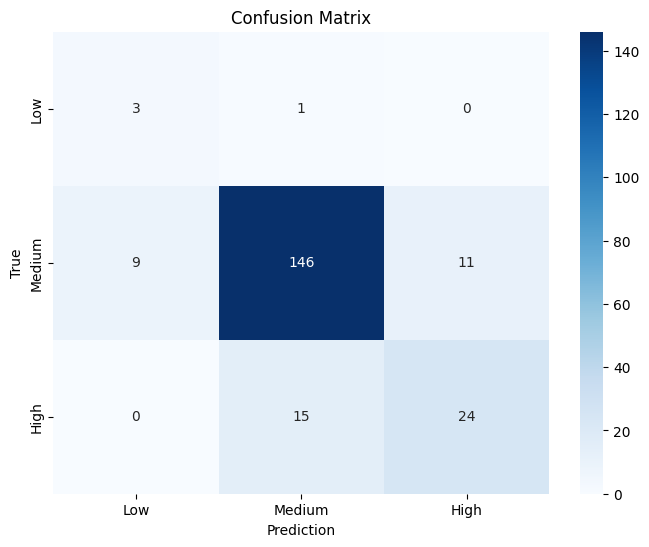

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Create the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])

# Titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()



- Accuracy: The model correctly predicted 83% of the observations in the test set.

- Precision , Recall, F1-Score
    - Class High:

        - Precision (69%): Of the predictions made for the High class, 69% were correct.
        - Recall (62%): The model correctly identified 62% of the actual instances of the High class.
        - F1-Score (65%): Moderate performance balancing precision and recall.
    - Class Low:

        - Precision (25%): Only 25% of the predictions made for the Low class were correct.
        - Recall (75%): While it identifies most of the actual instances of Low, it generates many false positives.
        - F1-Score (38%): Low performance, likely due to the small number of examples in the class (Support = 4).
    - Class Medium:

        - Precision (90%): Most predictions for Medium are correct.
        - Recall (88%): The model correctly identifies 88% of the actual instances of this class.
        - F1-Score (89%): High performance for this class, likely because it is the most represented class (Support = 166).
- Confusion Matrix:

    - Main diagonal (dark blue): Shows correct predictions. For example, the model correctly predicted 146 instances as "Medium".
    - Off-diagonal: Shows incorrect predictions. For example, the model incorrectly classified 9 instances of "Medium" as "Low".
- Conclusion:

    - Strong performance on "Medium": The model is very good at classifying instances as "Medium".
    - Challenges with "Low" and "High": The model struggles to distinguish between "Low" and "High", often misclassifying them as "Medium".